# Loading Libraries

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Derivatives

In [ ]:

#Basically neural networks are inputs + weights, among which we can tweak the weights so that we can minimise loss.
#Example of a scalar function is as below
def f(x):
  return 3**x*2 - 4*x + 5


In [ ]:
f(3.0)

47.0

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)

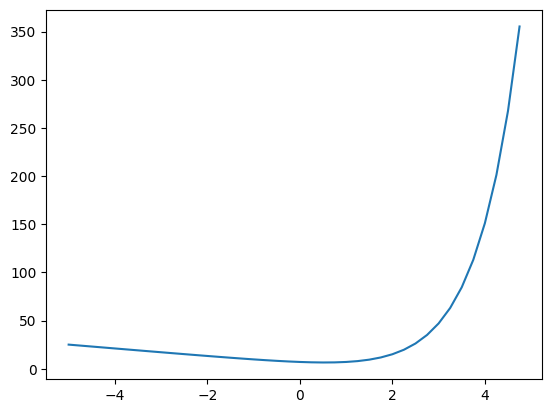

In [ ]:
plt.plot(xs,ys)

In [ ]:
h = .000001
a = 2
b = 3
c = 4

f1 = a%b -c

In [ ]:
a += h
f2 = a%b -c

In [ ]:
f2-f1

1.000000000139778e-06

# Value Class v1

In [ ]:
# creating blueprint of name Class
class Value:

  #initializing with value 'data'
  def __init__(self, data):
    self.data = data
  # creating a function that can return some information
  def __repr__(self):
    return f"Value(data={self.data})"
  # adding a function that can take another value obj and add it to own.
  def __add__(self,other):
    return Value(self.data + other.data)
  # adding a function that can take another value obj and multiply it to own.
  def __mul__(self, other):
    return Value(self.data * other.data)


In [ ]:
a = Value(4)
b = Value(5)
a * b

Value(data=20)

Value(data=4)

# Value Class v2
##### Adding _children to track operations

In [ ]:
# creating blueprint of name Class
class Value:

  #initializing with value 'data'
  ## we now want to track operations that are going to be operatedon this class so one param '_children' is added
  def __init__(self, data,_children = ()):
    self.data = data
    self._prev = set(_children)
  # creating a function that can return some information
  def __repr__(self):
    return f"Value(data={self.data})"
  # adding a function that can take another value obj and add it to own.
  def __add__(self,other):
    out = Value(self.data + other.data,(self,other))
    return out
  # adding a function that can take another value obj and multiply it to own.
  def __mul__(self, other):
    out = Value(self.data * other.data,(self,other))
    return out


In [ ]:
a = Value(2)
b = Value(3)

In [ ]:
d = a+b

In [ ]:
d._prev

{Value(data=2), Value(data=3)}

# Value Class v3
##### Adding _op to track the operation symbol that was performed

In [ ]:
# creating blueprint of name Class
class Value:

  #initializing with value 'data'
  ## we now want to track operations that are going to be operatedon this class so one param '_children' is added
  def __init__(self, data,_children = (),_op=''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
  # creating a function that can return some information
  def __repr__(self):
    return f"Value(data={self.data})"
  # adding a function that can take another value obj and add it to own.
  def __add__(self,other):
    out = Value(self.data + other.data,(self,other),_op='+')
    return out
  # adding a function that can take another value obj and multiply it to own.
  def __mul__(self, other):
    out = Value(self.data * other.data,(self,other),_op='*')
    return out

In [ ]:
a = Value(4)
b = Value(5)
c = a + b

In [ ]:
c._op

'+'

## Introducing visualization of operations

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{data %.4f  }" % ( n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

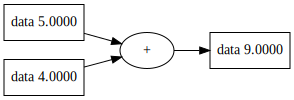

In [ ]:
draw_dot(c)

# Value Class v4
#### Adding Label for visualization purpose

In [ ]:
# creating blueprint of name Class
class Value:

  #initializing with value 'data'
  ## we now want to track operations that are going to be operatedon this class so one param '_children' is added
  def __init__(self, data,_children = (),_op='',label = ''):
    self.data = data
    self._prev = set(_children)
    self._op = _op
    self.label = label
  # creating a function that can return some information
  def __repr__(self):
    return f"Value(data={self.data})"
  # adding a function that can take another value obj and add it to own.
  def __add__(self,other):
    out = Value(self.data + other.data,(self,other),_op='+')
    return out
  # adding a function that can take another value obj and multiply it to own.
  def __mul__(self, other):
    out = Value(self.data * other.data,(self,other),_op='*')
    return out

# Example

In [ ]:
a = Value(5,label = 'a')
b = Value(7,label='b')
c = Value(8,label='b')
d = a * b ; d.label = 'd'
e = d * c ; e.label = 'e'

# Adding label to graph

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f  }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

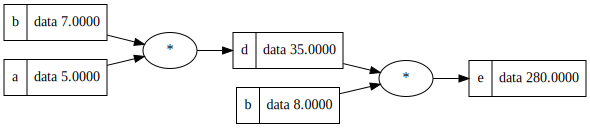

In [ ]:
draw_dot(e)

# Value Class v5

In [ ]:
# creating blueprint of name Class
class Value:

  #initializing with value 'data'
  ## we now want to track operations that are going to be operatedon this class so one param '_children' is added
  def __init__(self, data,_children = (),_op='',label = ''):
    self.data = data
    self.grad = 0.0
    self._prev = set(_children)
    self._op = _op
    self.label = label
  # creating a function that can return some information
  def __repr__(self):
    return f"Value(data={self.data})"
  # adding a function that can take another value obj and add it to own.
  def __add__(self,other):
    out = Value(self.data + other.data,(self,other),_op='+')
    return out
  # adding a function that can take another value obj and multiply it to own.
  def __mul__(self, other):
    out = Value(self.data * other.data,(self,other),_op='*')
    return out

# Adding grad label to visualization

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f  }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

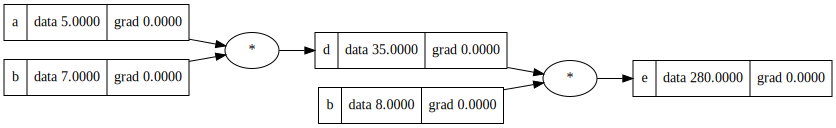

In [ ]:
# Example
a = Value(5,label = 'a')
b = Value(7,label='b')
c = Value(8,label='b')
d = a * b ; d.label = 'd'
e = d * c ; e.label = 'e'

draw_dot(e)

# Understanding Grad With Example

In [ ]:
class Value:
  def __init__(self, data, _children=(), _op='',label=''):
    self.data = data
    self.grad = 0
    self._prev = set(_children)
    self.label = label
    self._op = _op

  def __repr__(self):
    return f'Value(data={self.data})'

  def __add__(self,other):
    out = Value(self.data + other.data,(self,other),'+')
    return out


  def __mul__(self,other):
    out = Value(self.data * other.data,(self,other),'*')
    return out






In [ ]:
a = Value(3,label='a')
b = Value(2,label='b')
c = Value(5,label='c')
l = c * b ; l.label = 'l'
g = l + a ; g.label = 'g'
k = Value(-4,label = 'k')
x =g*k ; x.label = 'x'


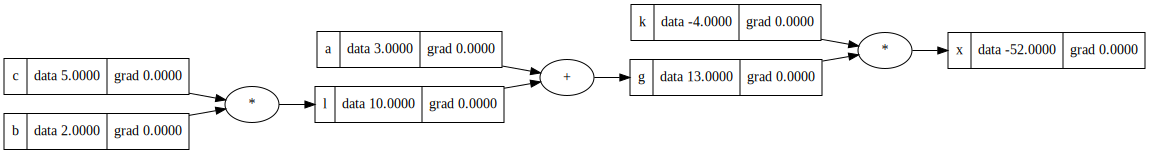

In [ ]:
draw_dot(x)

In [ ]:
# Below this cell we will calculate gradients and in this cell we will be finalizing and updating grad
x.grad = 1.0
g.grad = -4.0
k.grad = 13.0
a.grad = -4.0
l.grad = -4.0
c.grad = -8.0
b.grad = -20.0

In [ ]:
# Through this function we can find grad through manually bumping value by h
def find_grad():
  h = .0000001
  a = Value(3,label='a')
  b = Value(2,label='b')
  c = Value(5,label='c')
  l = c * b ; l.label = 'l'
  g = l + a ; g.label = 'g'
  k = Value(-4,label = 'k')
  x =g*k ; x.label = 'x'

  L1 = x.data

  a = Value(3,label='a')
  b = Value(2,label='b')
  b.data += h
  c = Value(5,label='c')
  l = c * b ; l.label = 'l'
  g = l + a ; g.label = 'g'
  k = Value(-4,label = 'k')
  x =g*k ; x.label = 'x'



  L2 = x.data
  grad = (L2-L1)/h

  return grad



In [ ]:
find_grad()

-19.999999949504854

In [ ]:
# Through calculus let's see this as well
# f1 = x
# f2 = x + h
# grad = (f2-f1)/h
# grad = (x+h -x)/h = 1

In [ ]:
# let's see what's happening at node kgx
# x = l * g
# dx/dg = k
# dx/dk = g
# Through find_grad also we are able to confirm this
# (k*g+h)- (k*g)/h = kg+kh-kg/h = k

# dx/db = dx/dl * dl/db
# dx/db = -4 * 5
# dx/dc = -4* 2

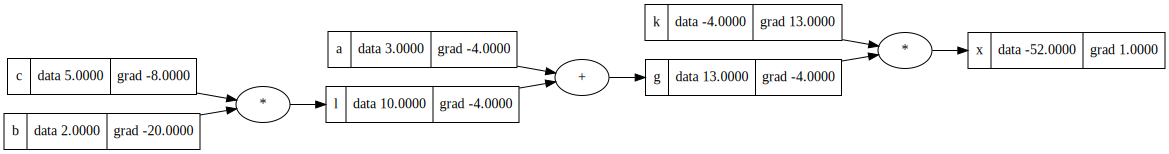

In [ ]:
# After calculating grad let's draw the graph again
draw_dot(x)

In [ ]:
# Let's change the weights so that the loss minimises i.e in the direction of the gradient.
c.data += 0.01 + c.grad
b.data += 0.01 + b.grad
a.data += 0.01 + a.grad
k.data += 0.01 + k.grad

# The reason we are not changing grad of the rest of values because they are dependant and only a,b,c & k are independent


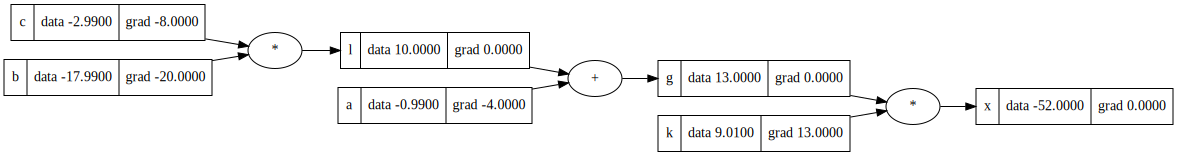

In [ ]:
draw_dot(x)

In [ ]:
# Now we will do a forward pass i.e. taking these values which are influenced by gradient and calculate the graph.
l = c * b ; l.label = 'l'
g = l + a ; g.label = 'g'
x =g*k ; x.label = 'x'

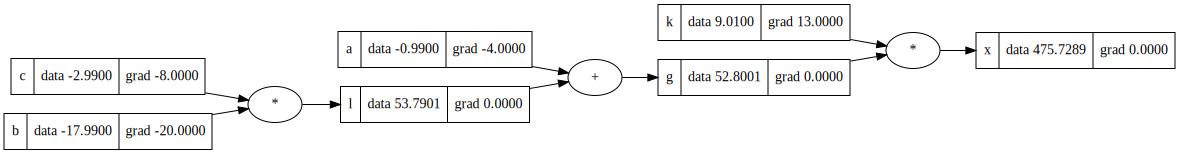

In [ ]:
draw_dot(x)

In [ ]:
# we can see that the x has moved into positive direction (significant move we don't want that, we can lower the bais in this case)
# This completes the example and next we will try to do forward and backward pass using neuron.

# Forward and Backward Pass in an Neuron

In [ ]:
#inputs x1, x2
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')
# weights w1,w2
w1 = Value(-3.0,label='w1')
w2 = Value(1.0, label='w2')
#bias of neuron
b = Value(6.7, label='b')
#Multiplying inputs and weights
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
#Adding all up
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2';
#Introducing bias
n = x1w1x2w2 + b ; n.label='n'

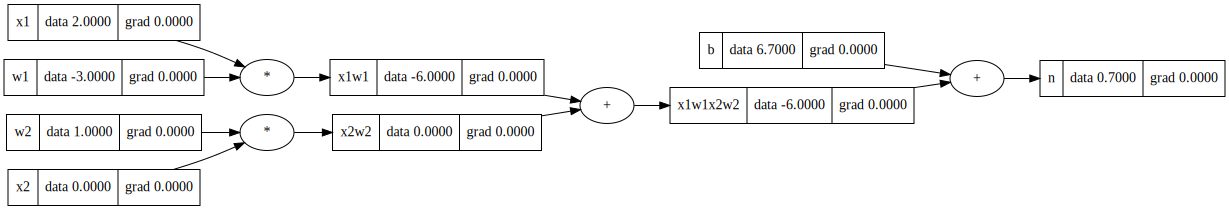

In [ ]:
draw_dot(n)

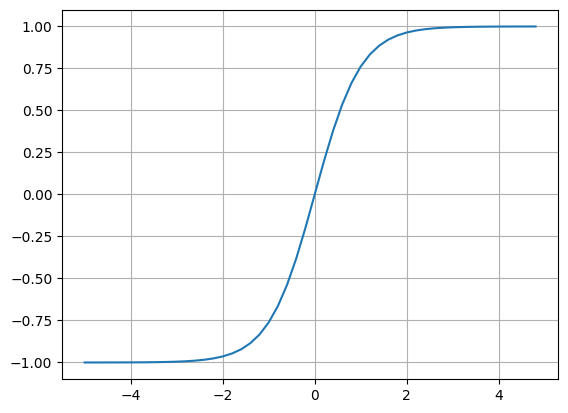

In [ ]:
# This represents tanh function
# This is called the squashing function
# The main goal of squashing function is to squash the coming inputs between a certain range in case of tanh it is between -1 and 1\
# Which basically means what ever you give to tanh between -infinity to +infinity we will always get result between -1 and 1
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)));plt.grid()

In [ ]:
# Till yet we had the summation of all weights and input with bias added
# For output we need to squash this result and for this we have to pass this through an activation function in our case we
# Are choosing tanh as the activation function, that means we will need to implement tanh in our Vaule Class.

# Adding Tanh to Value Class

In [ ]:
# tanh ( x ) = sinh ( x ) cosh ( x ) = e 2 x − 1 e 2 x + 1
# let's import math to do exponential
class Value:
  def __init__(self, data, _children=(), _op='',label=''):
    self.data = data
    self.grad = 0
    self._prev = set(_children)
    self.label = label
    self._op = _op

  def __repr__(self):
    return f'Value(data={self.data})'

  def __add__(self,other):
    out = Value(self.data + other.data,(self,other),'+')
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) -1)/(math.exp(2*x)+ 1)
    out = Value(t,(self,),'tanh')
    return out

  def __mul__(self,other):
    out = Value(self.data * other.data,(self,other),'*')
    return out


In [ ]:
# let's compute the neural calcultaions again this time with tanh
#inputs x1, x2
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')
# weights w1,w2
w1 = Value(-3.0,label='w1')
w2 = Value(1.0, label='w2')
#bias of neuron
b = Value(6.8813735870195342, label='b')
#Multiplying inputs and weights
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
#Adding all up
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2';
#Introducing bias
n = x1w1x2w2 + b ; n.label='n'
o = n.tanh() ; o.label = 'o'

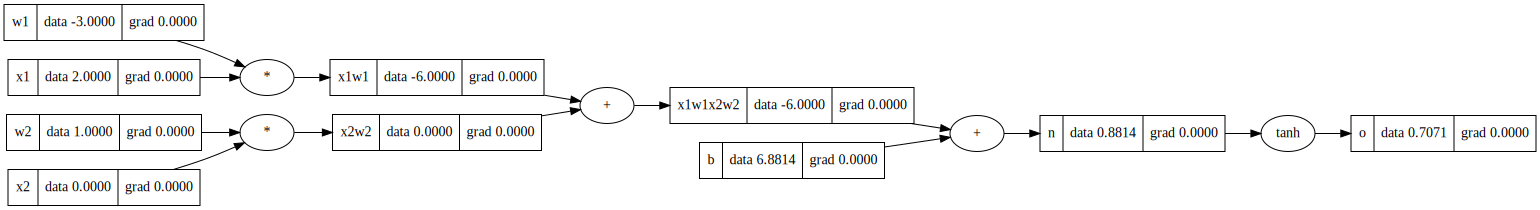

In [ ]:
draw_dot(o)

In [ ]:
# we will fill all the grads in this cell after performing calculations below this cell
o.grad = 1
n.grad = 0.5
b.grad = 0.5
x1w1x2w2.grad = 0.5
x2w2.grad = 0.5
x1w1.grad = 0.5
w2.grad = 0
x2.grad = 0.5
x1.grad = -3 * 0.5
w1.grad = 2* 0.5

In [ ]:
# Let's backpropagate through this graph (for every element we need to differentiate with respect to o)

# o = tanh(n)
# do/dn = 1 - tanh(n)**2
# o.data = 0.6043677771171636
# do/dn = 1-(0.6043677771171636)**2
1-(o.data**2)
# do/dn = 0.5

# do/db= dn/db * do/dn
# do/db = 1 * 0.5
# do/db = 0.5
# do/dw2 = dx2w2/dw2 * do/dx2w2
# do/dw2 = x2 * 0.5
# do/dw2 = 0



0.5000000000000062

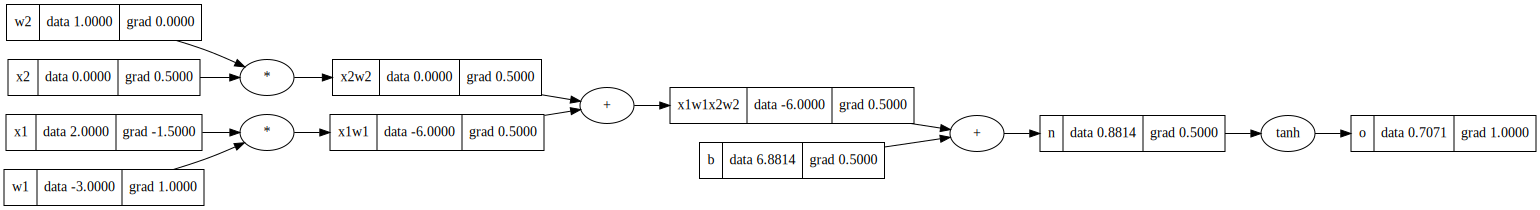

In [ ]:
draw_dot(o)

# Implementing backward pass in Value Class

In [ ]:
# To implement backward pass we have to know that
# 1. For addition the loss wrt to last node is simply copied over the node that we are calculating
class Value:
  def __init__(self, data, _children=(), _op='',label=''):
    self.data = data
    self.grad = 0
    self._backward = lambda : None
    self._prev = set(_children)
    self.label = label
    self._op = _op

  def __repr__(self):
    return f'Value(data={self.data})'

  def __add__(self,other):
    out = Value(self.data + other.data,(self,other),'+')

    def _backward(self):
      self.grad = 1.0 + out.grad
      other.grad = 1.0 + out.grad
    out._backward = _backward()
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) -1)/(math.exp(2*x)+ 1)
    out = Value(t,(self,),'tanh')

    def _backward(self):
      self.grad = (1-t**2) * out.grad
    out._backward = _backward()
    return out

  def __mul__(self,other):
    out = Value(self.data * other.data,(self,other),'*')
    def _backward(self):
      self.grad = other.grad * out.grad
      other.grad = self.grad * out.grad
    out._backward = _backward()
    return out


# Example using _backward functon

In [ ]:
# let's compute the neural calcultaions again this time with tanh
#inputs x1, x2
x1 = Value(2.0,label='x1')
x2 = Value(0.0,label='x2')
# weights w1,w2
w1 = Value(-3.0,label='w1')
w2 = Value(1.0, label='w2')
#bias of neuron
b = Value(6.8813735870195342, label='b')
#Multiplying inputs and weights
x1w1 = x1*w1; x1w1.label='x1w1'
x2w2 = x2*w2; x2w2.label='x2w2'
#Adding all up
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label='x1w1x2w2';
#Introducing bias
n = x1w1x2w2 + b ; n.label='n'
o = n.tanh() ; o.label = 'o'

TypeError: ignored

In [ ]:
draw_dot(o)

In [ ]:
o.grad = 1

In [ ]:
n._backward()